C:\Users\moinm\AppData\Local\Temp\ipykernel_21212\4003951193.py:30: RuntimeWarning: divide by zero encountered in log10
  r_log = np.log10(vek_r)-np.max(np.log10(vek_r))
C:\Users\moinm\AppData\Local\Temp\ipykernel_21212\4003951193.py:31: RuntimeWarning: invalid value encountered in multiply
  coord_cart_r = coord_cart * r_log/10
C:\Users\moinm\AppData\Local\Temp\ipykernel_21212\4176481909.py:188: RuntimeWarning: divide by zero encountered in log10
  TS = 10 * np.log10((energy[0]**2) / ((energy[2] + energy[3])**2))
C:\Users\moinm\AppData\Local\Temp\ipykernel_21212\4176481909.py:189: RuntimeWarning: divide by zero encountered in log10
  TH = 10 * np.log10((energy[0]**2) / ((energy[2] + energy[3] + energy[4])**2))
C:\Users\moinm\AppData\Local\Temp\ipykernel_21212\4003951193.py:127: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control

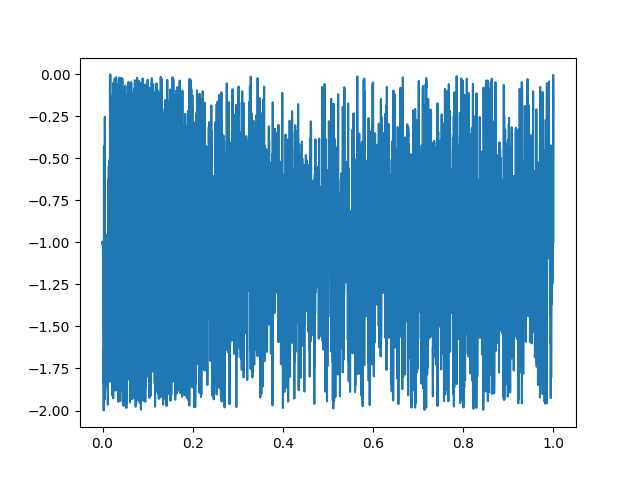

In [33]:
import spaudiopy as spa
import pyfar as pf
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import soundfile as sf
import glob
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib widget

# load only Ambisonics B-Format components
n = 0
HOA_files_b = ["" for x in range(4)]

for i in [f'{i:>02}' for i in range(1, 5)]:
    HOA_files_b[n] = "HOA\HOA_A10p_S00_R00_CH" + i + ".wav"
    n = n+1

MultiSig = spa.io.load_audio(HOA_files_b)
ambi_b = spa.sig.AmbiBSignal.sh_to_b(MultiSig)

# Berechnung der Schalleinfallsrichtungen über Pseudointensität (IRIS)
vek_azi, vek_zen, vek_r = spa.parsa.pseudo_intensity(ambi_b, win_len=21, f_bp = (63,4000)) # win_len = 441 = 1 ms Mittelung
# vek_r = np.log10(np.abs(vek_r))

# Berechnung der Intensitätsvektoren
# coord_ps_i = spa.utils.sph2cart(vek_azi, vek_zen, vek_r)
coord_cart = spa.utils.dir2cart(vek_azi, vek_zen)
r_log = np.log10(vek_r)-np.max(np.log10(vek_r))
coord_cart_r = coord_cart * r_log/10
# coord_cart_r = coord_cart_r - np.max(20* np.log10(vek_r))

## Plot der Intensitätsvektoren
# Definition des Evaluationszeitraumes
t_start = int(ambi_b.fs * 0.015)
t_ev = int(ambi_b.fs * 0.025)
# t_ev2 = int(ambi_b.fs * 0.6)

# Extraktion der Vektorendpunkte (benötigt, für Zeitoptimierung)
x_pl = coord_cart_r[0]*(-1)
y_pl = coord_cart_r[1]*(-1)
z_pl = coord_cart_r[2]*(-1)

# Plot der Vektoren
# fig = plt.figure()
# ax = Axes3D(fig)
# # ax = plt.axes(projection='3d')
# # color = np.linspace(0.0,1.0,t_ev2)# np.arange(t_ev2)/t_ev2

# def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
#     c1=np.array(mpl.colors.to_rgb(c1))
#     c2=np.array(mpl.colors.to_rgb(c2))
#     return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

# c2='red' #blue
# c1='yellow' #green
# n = t_ev

#-------------------------------------------------------
# for i in range(t_ev, t_ev2):
#     ax.plot3D([0,x_pl[i]],[0,y_pl[i]],[0,z_pl[i]], c = colorFader(c1,c2,i/n))#'orange')

# for i in range(0, t_ev):
#     ax.plot3D([0,x_pl[i]],[0,y_pl[i]],[0,z_pl[i]], c = colorFader(c1,c2,i/n))#'red')

# ax.plot3D([0,10],[0,0],[0,0],'green')

# ax.axes.set_xlim3d(left=-5, right=5)
# ax.axes.set_ylim3d(bottom=-5, top=5)
# ax.axes.set_zlim3d(bottom=-5, top=5)
# ax.set_title("3D plot") 
# ax.set_xlabel('x-axis') 
# ax.set_ylabel('y-axis') 
# ax.set_zlabel('z-axis') 
#-------------------------------------------------------

# ax = plt.axes(projection='3d')
# # for i in range(t_ev, t_ev2):
# #     ax.plot3D([0,x_pl[i]],[0,y_pl[i]],[0,z_pl[i]],c = colorFader(c1,c2,i/n))

# for i in range(0, t_ev):
#     ax.plot3D([0,x_pl[(i-t_ev)*4]],[0,y_pl[(i-t_ev)*4]],[0,z_pl[(i-t_ev)*4]],c = colorFader(c1,c2,i/n))

# ax.plot3D([0,1.2],[0,0],[0,0],'blue', label =  'vorne')

# ax.axes.set_xlim3d(left=-1.5, right=1.5)
# ax.axes.set_ylim3d(bottom=-1.5, top=1.5)
# ax.axes.set_zlim3d(bottom=-1.5, top=1.5)
# ax.set_title("Pseudointensität über die Zeit") 
# ax.set_xlabel('hinten-vorne') 
# ax.set_ylabel('rechts-links') 
# ax.set_zlabel('unten-oben')
# ax.legend()

#-------------------------------------------------------

# # Plot der Schalleinfallsrichtungen in azi/zen/r/t
# spa.plot.doa(vek_azi[t_start:t_ev], vek_zen[t_start:t_ev], vek_r[t_start:t_ev],  fs = ambi_b.fs)
# spa.plot.doa(vek_azi[t_ev:t_ev2], vek_zen[t_ev:t_ev2],vek_r[t_ev:t_ev2], fs = ambi_b.fs)

# ambi_b_signal = ambi_b.get_signals()
# ambi_b_time = np.linspace(0,len(ambi_b_signal[0])/ambi_b.fs,len(ambi_b_signal[0]))
# fig, ax1 = plt.subplots()
# ax1.plot(ambi_b_time[0:t_ev2], 10*np.log10(ambi_b_signal[0, 0:t_ev2]**2))
# ax1.set_xlabel('t in s')
# ax1.set_ylabel('L in dB')
# bzw. über SDM


azimuth = vek_azi
elevation = vek_zen/- (np.pi / 2)
radius = vek_r


# data = add_sector2arrays(azimuth, elevation, radius)
data = np.empty((azimuth.shape[0], 4))
for i, (azi_i, elev_i, r_i) in enumerate(zip(azimuth, elevation, radius)):
    label_i = sector_classfier(azi_i, elev_i)
    sample_data = np.array([azi_i, elev_i, r_i, label_i])
    data[i,:] = sample_data

energy = energy_per_sector(data, start_milliseconds=15, stop_milliseconds=100, samplerate=44100)
TH, TS = calc_TS_TH(energy)
# ... viele Wege führen nach Rom und manchmal sogar zur CD_ROM
# np.min(elevation)
plt.figure()
plt.plot(np.linspace(0,1,len(data[:,1])), data[:,1])# np.log10(data[:,2]))
plt.show()


FuMa = ambi_b.get_signals()#[0:4]
ACN = np.array([FuMa[0],FuMa[3],FuMa[1],FuMa[2]])
# FuMa = MultiSig.get_signals()#[0:8]
# ACN = np.array((FuMa[0],FuMa[3],FuMa[1],FuMa[2],FuMa[6],FuMa[7],FuMa[5],FuMa[8],FuMa[4]))
aaaaaaaaaahhhh = MultiSig.get_signals()

In [4]:
def y_top(x, x_offset): 
    y_0_top = 0.19591327601530384
    amplitude = 0.05408672398469633
    y_top = amplitude * np.sin((x-x_offset) * 2 * np.pi) + y_0_top

    return y_top



def y_bottom(x, x_offset):
    y_0_bottom = -0.19591327601530367
    amplitude = 0.05408672398469633
    y_bottom = -amplitude * np.sin((x-x_offset) * 2 * np.pi) + y_0_bottom

    return y_bottom



def sector_classfier(azi, elev):

    # convert to rad
    azi = azi / np.pi
    elev = elev / np.pi

    # convert zenith to elevation
    #elev = elev -0.5
    
    vertical_rigth_back = 0.75
    vertical_front_right = 0.25
    vertical_back_left = -0.75
    vertical_left_front = -0.25

    label = -1

    # back west
    if azi < vertical_back_left and azi >= -1:
        #check for top / bottom
        x_offset = -1.25

        # check top
        if elev > y_top(azi, x_offset):
            label = 0

        # check bottom
        elif elev < y_bottom(azi, x_offset):
            label = 5

        else:
            label = 4
            
    # left
    elif azi >= vertical_back_left and azi <= vertical_left_front:
        #check for top / bottom
        x_offset = -0.75

        # check top
        if elev > y_top(azi, x_offset):
            label = 0

        # check bottom
        elif elev < y_bottom(azi, x_offset):
            label = 5

        else:
            label = 2

    # front
    elif azi > vertical_left_front and azi < vertical_front_right:
        #check for top / bottom
        x_offset = -0.25

        # check top
        if elev > y_top(azi, x_offset):
            label = 0

        # check bottom
        elif elev < y_bottom(azi, x_offset):
            label = 5

        else:
            label = 1

    # right
    elif azi >= vertical_front_right and azi <= vertical_rigth_back:
        #check for top / bottom
        x_offset = 0.25

        # check top
        if elev > y_top(azi, x_offset):
            label = 0

        # check bottom
        elif elev < y_bottom(azi, x_offset):
            label = 5

        else:
            label = 3

    # back east
    elif azi > vertical_rigth_back and azi <= 1:
        #check for top / bottom
        x_offset = 0.75

        # check top
        if elev > y_top(azi, x_offset):
            label = 0

        # check bottom
        elif elev < y_bottom(azi, x_offset):
            label = 5

        else:
            label = 4


    return int(label)




def label2sectorname(label):    
    # give sectors a label
    match label:
        case 0:
            sector_name = "top"
        case 1:
            sector_name = "front"
        case 2:
            sector_name = "left"
        case 3:
            sector_name = "right"
        case 4:
            sector_name = "back"
        case 5:
            sector_name = "bottom"
        case _:
            sector_name = (f"could not determine sector name from label {label}")
    
    return sector_name



def add_sector2arrays(azimuth: np.ndarray, elevation: np.ndarray, radius: np.ndarray):
    
    data = np.empty((azimuth.shape[0], 4))
    for i, (azi_i, elev_i, r_i) in enumerate(zip(azimuth, elevation, radius)):
        label_i = sector_classfier(azi_i, elev_i)
        sample_data = np.array([azi_i, elev_i, r_i, label_i])
        data[i,:] = sample_data
        
    return data



def energy_per_sector(data: np.ndarray, start_milliseconds=15, stop_milliseconds=100, samplerate=44100):
    # data dimensions: azimuth, elevation, radius, label

    start_sample = int(start_milliseconds / 1000 * samplerate)
    stop_sample = int(stop_milliseconds /1000 * samplerate)

    data = data[start_sample:stop_sample, :]


    # get indices of label
    top_idx = np.where(data[:,3] == 0)[0]
    front_idx = np.where(data[:,3] == 1)[0]
    left_idx = np.where(data[:,3] == 2)[0]
    right_idx = np.where(data[:,3] == 3)[0]
    back_idx = np.where(data[:,3] == 4)[0]
    bottom_idx = np.where(data[:,3] == 5)[0]

    # sum energys per label
    top_energy = np.sum(np.abs(data[[top_idx], 2]))
    front_energy = np.sum(np.abs(data[[front_idx], 2]))
    left_energy = np.sum(np.abs(data[[left_idx], 2]))
    right_energy = np.sum(np.abs(data[[right_idx], 2]))
    back_energy = np.sum(np.abs(data[[back_idx], 2]))
    bottom_energy = np.sum(np.abs(data[[bottom_idx], 2]))

    energy = np.array([top_energy, front_energy, left_energy, right_energy, back_energy, bottom_energy])
    
    return energy




def calc_TS_TH(energy):
    TS = 10 * np.log10((energy[0]**2) / ((energy[2] + energy[3])**2))
    TH = 10 * np.log10((energy[0]**2) / ((energy[2] + energy[3] + energy[4])**2))

    return TS, TH